# Transforming Data with *dplyr*

Use this notebook to work along with the examples in the lecture notes

## Task 1

Import the files **bnames.csv.bz2** and **births.csv** from **babyData.zip**

In [5]:
births <- read.csv("./babyData/births.csv")
bnames <- read.csv("./babyData/bnames.csv.bz2")

## Task 2

1. Use logical subsetting to extract your name from the dataset
2. Plot the trend over time
3. What geom should you use?
4. Do you need any extra aesthetics



`geom_smooth()` using method = 'loess' and formula 'y ~ x'



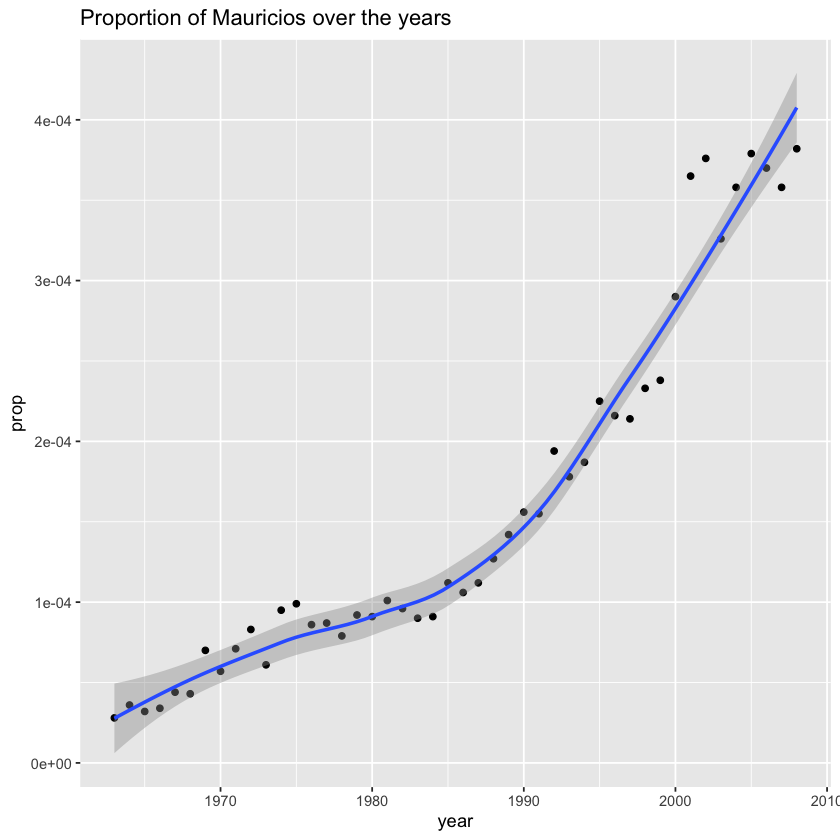

In [39]:
library(ggplot2)
mauricios <- bnames[bnames$name=="Mauricio",]
qplot(data=mauricios, year, prop, main="Proportion of Mauricios over the years") + geom_smooth()


Notice the zigzag patterns above. In the case of the name *Michael* they are caused by entries for girls around the early *1920s*. Investigate what's causing this in the code block below.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



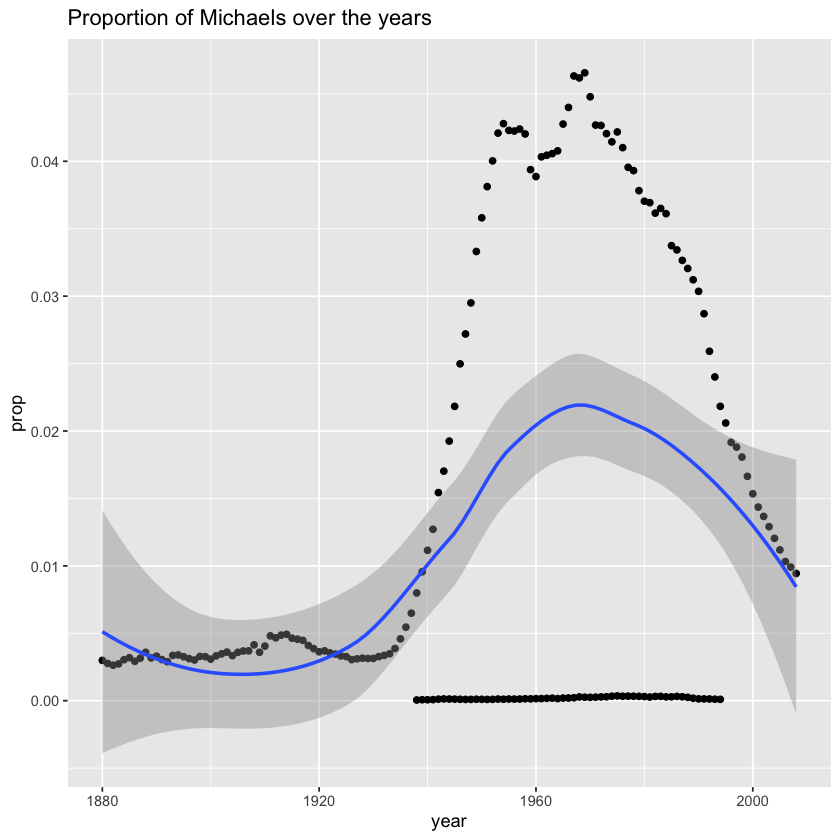

In [40]:
michaels <- bnames[bnames$name=="Michael",]
qplot(data=michaels, year, prop, main="Proportion of Michaels over the years") + geom_smooth()


Let's separate these into 2 series, one for boys and one for girls

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



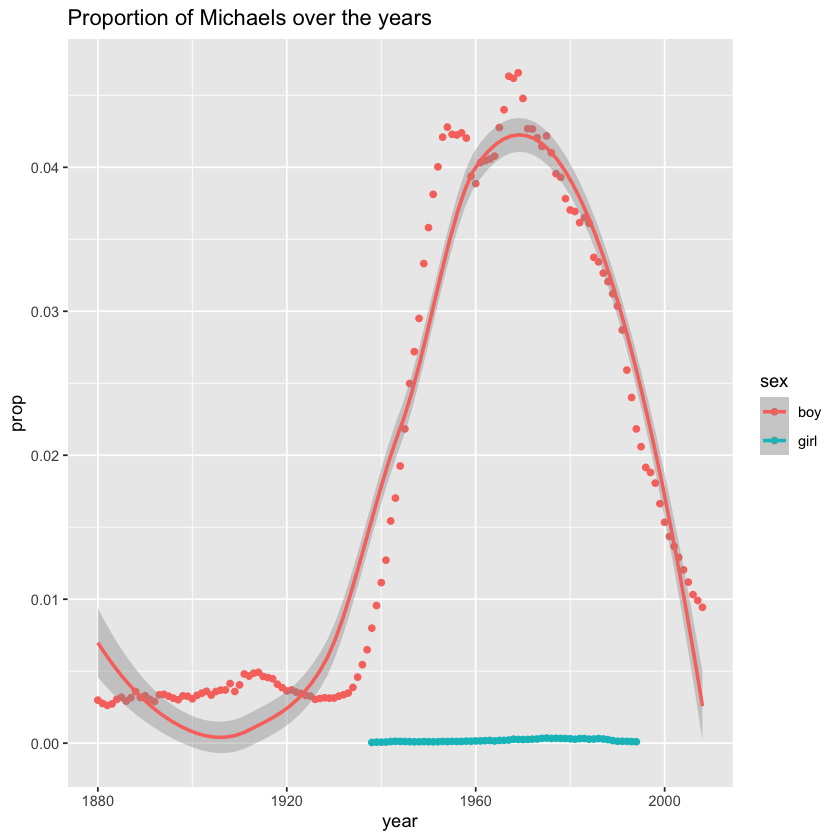

In [43]:
qplot(data=michaels, year, prop, main="Proportion of Michaels over the years", color=sex) + geom_smooth()

## Filtering Data in dplyr

The *stats* package provides its own implementation of **filter** which works differently to *dplyr*'s implementation. If you find you're getting strange results, make sure you've loaded the *dplyr* package using either **require()** or **library()**

The code block below defines the colour dataframe

In [44]:
library('dplyr')
colour <- c('blue', 'black', 'blue', 'blue', 'black')
value <- 1:5
df <- data.frame(colour, value)
df


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




colour value
1 blue   1    
2 black  2    
3 blue   3    
4 blue   4    
5 black  5

Filter out all rows where the colour column is not equal to **blue**

In [45]:
filter(df, colour == 'blue')

colour value
1 blue   1    
2 blue   3    
3 blue   4

This time we are filtering rows that have 1 or 4 in the value column

In [46]:
filter(df, value %in% c(1,4))

colour value
1 blue   1    
2 blue   4

## Task 3

Use filter to find all of the girls' names from the year 2000

In [48]:
filter(bnames, sex == "girl" & year == 2000)

year name      prop     sex  soundex
1    2000 Emily     0.013017 girl E540   
2    2000 Hannah    0.011569 girl H500   
3    2000 Madison   0.010017 girl M325   
4    2000 Ashley    0.009027 girl A240   
5    2000 Sarah     0.008865 girl S600   
6    2000 Alexis    0.008837 girl A422   
7    2000 Samantha  0.008660 girl S553   
8    2000 Jessica   0.007876 girl J220   
9    2000 Taylor    0.007564 girl T460   
10   2000 Elizabeth 0.007561 girl E421   
11   2000 Lauren    0.007110 girl L650   
12   2000 Alyssa    0.006798 girl A420   
13   2000 Kayla     0.006677 girl K400   
14   2000 Abigail   0.006564 girl A124   
15   2000 Brianna   0.006458 girl B650   
16   2000 Olivia    0.006446 girl O410   
17   2000 Emma      0.006287 girl E500   
18   2000 Megan     0.005737 girl M250   
19   2000 Grace     0.005660 girl G620   
20   2000 Victoria  0.005477 girl V236   
21   2000 Rachel    0.005345 girl R240   
22   2000 Anna      0.005301 girl A500   
23   2000 Sydney    0.005138 girl S350   
24   2000 Destiny   0.004935 girl D235   
25   2000 Morgan    0.004767 girl M625   
26   2000 Jennifer  0.004706 girl J516   
27   2000 Jasmine   0.004557 girl J255   
28   2000 Haley     0.004550 girl H400   
29   2000 Kaitlyn   0.004394 girl K345   
30   2000 Julia     0.004393 girl J400   
⋮    ⋮    ⋮         ⋮        ⋮    ⋮      
971  2000 Beatrice  0.000109 girl B362   
972  2000 Blair     0.000109 girl B460   
973  2000 Kori      0.000109 girl K600   
974  2000 Annamarie 0.000109 girl A556   
975  2000 Breonna   0.000109 girl B650   
976  2000 Luisa     0.000109 girl L200   
977  2000 Rhianna   0.000109 girl R500   
978  2000 Yasmeen   0.000109 girl Y255   
979  2000 Yessenia  0.000109 girl Y250   
980  2000 Breanne   0.000108 girl B650   
981  2000 Laisha    0.000108 girl L200   
982  2000 Leann     0.000108 girl L500   
983  2000 Amina     0.000108 girl A550   
984  2000 Jailyn    0.000108 girl J450   
985  2000 Jayde     0.000108 girl J300   
986  2000 Jena      0.000108 girl J500   
987  2000 Jill      0.000108 girl J400   
988  2000 Katlynn   0.000108 girl K345   
989  2000 Kaylan    0.000108 girl K450   
990  2000 Kenna     0.000107 girl K500   
991  2000 Rayna     0.000107 girl R500   
992  2000 Iyana     0.000107 girl I500   
993  2000 Keeley    0.000107 girl K400   
994  2000 Kenia     0.000107 girl K500   
995  2000 Maiya     0.000107 girl M000   
996  2000 Mandy     0.000107 girl M530   
997  2000 Melisa    0.000107 girl M420   
998  2000 Sky       0.000107 girl S000   
999  2000 Adrian    0.000106 girl A365   
1000 2000 Marlen    0.000106 girl M645

## Projecting Data in dplyr

**Projection** is a fancy way of saying *selecting* columns from a data frame. If we select only certain rows then we are *filtering* (removing rows that don't meet a condition), when we select columns we are *projecting*.

In this example we wish to select the colour column from the data

In [49]:
select(df, colour)

colour
1 blue  
2 black 
3 blue  
4 blue  
5 black

Suppose that we wish to select every column except the colour column

In [50]:
select(df, -colour)

value
1 1    
2 2    
3 3    
4 4    
5 5

## Task 4

Select the *year*, *name* and *sex* columns from babyNames

In [51]:
select(bnames, c(year,name,sex))

year name     sex 
1      1880 John     boy 
2      1880 William  boy 
3      1880 James    boy 
4      1880 Charles  boy 
5      1880 George   boy 
6      1880 Frank    boy 
7      1880 Joseph   boy 
8      1880 Thomas   boy 
9      1880 Henry    boy 
10     1880 Robert   boy 
11     1880 Edward   boy 
12     1880 Harry    boy 
13     1880 Walter   boy 
14     1880 Arthur   boy 
15     1880 Fred     boy 
16     1880 Albert   boy 
17     1880 Samuel   boy 
18     1880 David    boy 
19     1880 Louis    boy 
20     1880 Joe      boy 
21     1880 Charlie  boy 
22     1880 Clarence boy 
23     1880 Richard  boy 
24     1880 Andrew   boy 
25     1880 Daniel   boy 
26     1880 Ernest   boy 
27     1880 Will     boy 
28     1880 Jesse    boy 
29     1880 Oscar    boy 
30     1880 Lewis    boy 
⋮      ⋮    ⋮        ⋮   
257971 2008 Chana    girl
257972 2008 Avah     girl
257973 2008 Donna    girl
257974 2008 Kaylah   girl
257975 2008 Ashtyn   girl
257976 2008 Karsyn   girl
257977 2008 Makaila  girl
257978 2008 Shayna   girl
257979 2008 Essence  girl
257980 2008 Leticia  girl
257981 2008 Miya     girl
257982 2008 Rory     girl
257983 2008 Desirae  girl
257984 2008 Kianna   girl
257985 2008 Laurel   girl
257986 2008 Neveah   girl
257987 2008 Amaris   girl
257988 2008 Hadassah girl
257989 2008 Dania    girl
257990 2008 Hailie   girl
257991 2008 Jamiya   girl
257992 2008 Kathy    girl
257993 2008 Laylah   girl
257994 2008 Riya     girl
257995 2008 Diya     girl
257996 2008 Carleigh girl
257997 2008 Iyana    girl
257998 2008 Kenley   girl
257999 2008 Sloane   girl
258000 2008 Elianna  girl

## Arranging Data in *dplyr*

Arranging is another way of saying re-ordering or *sorting* data.

We may wish to arrange the rows of a data frame based on the values of a particular column. Sort the dataframe by colour, ascending

In [52]:
arrange(df, colour)

colour value
1 black  2    
2 black  5    
3 blue   1    
4 blue   3    
5 blue   4

We can also arrange rows based on a column in *descending* order. Sort the dataframe based on the value column, descending

In [53]:
arrange(df, desc(value))

colour value
1 black  5    
2 blue   4    
3 blue   3    
4 black  2    
5 blue   1

### Another Example

What happens if you run this R code? (see lecture notes)

In [54]:
arrange(df, colour, desc(value))

colour value
1 black  5    
2 black  2    
3 blue   4    
4 blue   3    
5 blue   1

## Task 5

1. Reorder the rows of babyNames from highest to lowest based on the *prop* variable
2. Which name had the highest proportion in a single year?
3. In what year did your name have the smallest proportion?

In [60]:
arrange(bnames, desc(prop))
arrange(filter(bnames, name == "Mauricio"), prop)

year name      prop     sex  soundex
1      1880 John      0.081541 boy  J500   
2      1881 John      0.080975 boy  J500   
3      1880 William   0.080511 boy  W450   
4      1883 John      0.079066 boy  J500   
5      1881 William   0.078712 boy  W450   
6      1882 John      0.078314 boy  J500   
7      1884 John      0.076476 boy  J500   
8      1882 William   0.076191 boy  W450   
9      1886 John      0.075820 boy  J500   
10     1885 John      0.075517 boy  J500   
11     1883 William   0.074558 boy  W450   
12     1887 John      0.074181 boy  J500   
13     1884 William   0.072475 boy  W450   
14     1880 Mary      0.072381 girl M600   
15     1889 John      0.071804 boy  J500   
16     1888 John      0.071186 boy  J500   
17     1890 John      0.071034 boy  J500   
18     1882 Mary      0.070431 girl M600   
19     1891 John      0.070292 boy  J500   
20     1881 Mary      0.069986 girl M600   
21     1885 William   0.069377 boy  W450   
22     1886 William   0.069318 boy  W450   
23     1892 John      0.068759 boy  J500   
24     1887 William   0.068344 boy  W450   
25     1888 William   0.066998 boy  W450   
26     1884 Mary      0.066990 girl M600   
27     1883 Mary      0.066737 girl M600   
28     1893 John      0.066495 boy  J500   
29     1894 John      0.065961 boy  J500   
30     1895 John      0.065699 boy  J500   
⋮      ⋮    ⋮         ⋮        ⋮    ⋮      
257971 1958 Eldridge  2.7e-05  boy  E436   
257972 1958 Maxwell   2.7e-05  boy  M240   
257973 1958 Renard    2.7e-05  boy  R563   
257974 1960 Aldo      2.7e-05  boy  A430   
257975 1960 Augustus  2.7e-05  boy  A223   
257976 1960 Burl      2.7e-05  boy  B640   
257977 1960 Elizabeth 2.7e-05  boy  E421   
257978 1960 Lauren    2.7e-05  boy  L650   
257979 1951 Bernardo  2.6e-05  boy  B656   
257980 1951 Cal       2.6e-05  boy  C400   
257981 1951 Cesar     2.6e-05  boy  C260   
257982 1951 Cole      2.6e-05  boy  C400   
257983 1951 Donal     2.6e-05  boy  D540   
257984 1951 Duke      2.6e-05  boy  D200   
257985 1951 Edsel     2.6e-05  boy  E324   
257986 1952 Brock     2.6e-05  boy  B620   
257987 1952 Glendon   2.6e-05  boy  G453   
257988 1952 Michale   2.6e-05  boy  M240   
257989 1952 Quincy    2.6e-05  boy  Q520   
257990 1952 Wilfredo  2.6e-05  boy  W416   
257991 1952 Wyman     2.6e-05  boy  W550   
257992 1952 Arlin     2.6e-05  boy  A645   
257993 1953 Alvaro    2.6e-05  boy  A416   
257994 1953 Antone    2.6e-05  boy  A535   
257995 1953 Bernardo  2.6e-05  boy  B656   
257996 1953 Caesar    2.6e-05  boy  C260   
257997 1953 Damian    2.6e-05  boy  D550   
257998 1956 Aron      2.6e-05  boy  A650   
257999 1956 Darcy     2.6e-05  boy  D620   
258000 1957 Cordell   2.6e-05  boy  C634

year name     prop     sex soundex
1  1963 Mauricio 0.000028 boy M620   
2  1965 Mauricio 0.000032 boy M620   
3  1966 Mauricio 0.000034 boy M620   
4  1964 Mauricio 0.000036 boy M620   
5  1968 Mauricio 0.000043 boy M620   
6  1967 Mauricio 0.000044 boy M620   
7  1970 Mauricio 0.000057 boy M620   
8  1973 Mauricio 0.000061 boy M620   
9  1969 Mauricio 0.000070 boy M620   
10 1971 Mauricio 0.000071 boy M620   
11 1978 Mauricio 0.000079 boy M620   
12 1972 Mauricio 0.000083 boy M620   
13 1976 Mauricio 0.000086 boy M620   
14 1977 Mauricio 0.000087 boy M620   
15 1983 Mauricio 0.000090 boy M620   
16 1980 Mauricio 0.000091 boy M620   
17 1984 Mauricio 0.000091 boy M620   
18 1979 Mauricio 0.000092 boy M620   
19 1974 Mauricio 0.000095 boy M620   
20 1982 Mauricio 0.000096 boy M620   
21 1975 Mauricio 0.000099 boy M620   
22 1981 Mauricio 0.000101 boy M620   
23 1986 Mauricio 0.000106 boy M620   
24 1985 Mauricio 0.000112 boy M620   
25 1987 Mauricio 0.000112 boy M620   
26 1988 Mauricio 0.000127 boy M620   
27 1989 Mauricio 0.000142 boy M620   
28 1991 Mauricio 0.000155 boy M620   
29 1990 Mauricio 0.000156 boy M620   
30 1993 Mauricio 0.000178 boy M620   
31 1994 Mauricio 0.000187 boy M620   
32 1992 Mauricio 0.000194 boy M620   
33 1997 Mauricio 0.000214 boy M620   
34 1996 Mauricio 0.000216 boy M620   
35 1995 Mauricio 0.000225 boy M620   
36 1998 Mauricio 0.000233 boy M620   
37 1999 Mauricio 0.000238 boy M620   
38 2000 Mauricio 0.000290 boy M620   
39 2003 Mauricio 0.000326 boy M620   
40 2004 Mauricio 0.000358 boy M620   
41 2007 Mauricio 0.000358 boy M620   
42 2001 Mauricio 0.000365 boy M620   
43 2006 Mauricio 0.000370 boy M620   
44 2002 Mauricio 0.000376 boy M620   
45 2005 Mauricio 0.000379 boy M620   
46 2008 Mauricio 0.000382 boy M620

## Mutating Data with *dplyr*

*Mutation* is a fancy way of saying *changing* the contents of a data frame. The most common use of mutation is to create calculated columns.

In [61]:
mutate(df, twice = 2 * value)

colour value twice
1 blue   1      2   
2 black  2      4   
3 blue   3      6   
4 blue   4      8   
5 black  5     10

In [62]:
mutate(df, twice = 2 * value, quadruple = 2 * twice)

colour value twice quadruple
1 blue   1      2     4       
2 black  2      4     8       
3 blue   3      6    12       
4 blue   4      8    16       
5 black  5     10    20

What happens if you run this R code? (see notes for details)

In [63]:
mutate(df, steps = cumsum(value))

colour value steps
1 blue   1      1   
2 black  2      3   
3 blue   3      6   
4 blue   4     10   
5 black  5     15

What happens if you run this R code? See lecture notes for details

In [64]:
temp <- mutate(df, twice = 2 * value, quadruple = 2 * twice)
mutate(temp, twice = NULL)

colour value quadruple
1 blue   1      4       
2 black  2      8       
3 blue   3     12       
4 blue   4     16       
5 black  5     20

## Summarising Data with *dplyr*

In the previous section we looked at creating new values with row-wise operations. We essentially made our dataset wider by adding extra columns. Summarising data allows us to apply some of the summary statistics we saw last week. Summarising data in dplyr will combine all rows into a single value.

In [65]:
summarise(df, total = sum(value))

total
1 15

More than one summary statistic may be calculated at a time. Calculate the total and average of the value of column

In [66]:
summarise(df, total = sum(value), avg = mean(value))

total avg
1 15    3

## Task 6

1. Add a new column to babyNames that converts *prop* to a percentage
2. Create a summary that displays the **min** and **max** *prop* for your name

In [69]:
bnames2 <- mutate(bnames, propPercent = prop * 100)
summarise(filter(bnames2, name == "Mauricio"), 
          minMauricioProp = min(propPercent), 
          maxMauricioProp = max(propPercent))

minMauricioProp maxMauricioProp
1 0.0028          0.0382

## Joining Data



In [70]:
x <- data.frame(
    name = c('John', 'Paul', 'George', 'Ringo', 'Stuart', 'Pete'),    
    instrument = c('guitar', 'bass', 'guitar', 'drums', 'bass', 'drums')
)

y <- data.frame(
    name = c('John', 'Paul', 'George', 'Ringo', 'Brian'), 
    band = c(T, T, T, T, F)
)

### Left Join

Include all x and matching rows of y

In [71]:
left_join(x, y, by = 'name')

name   instrument band
1 John   guitar     TRUE
2 Paul   bass       TRUE
3 George guitar     TRUE
4 Ringo  drums      TRUE
5 Stuart bass         NA
6 Pete   drums        NA

### Inner Join

include rows of x that appear in y and matching rows of y

In [72]:
inner_join(x, y, by = 'name')

name   instrument band
1 John   guitar     TRUE
2 Paul   bass       TRUE
3 George guitar     TRUE
4 Ringo  drums      TRUE

### Semi-Join
Include rows of x that appear in y

*This is like inner-join but without displaying the matching rows of y. This is really more of a filter.*

In [ ]:
semi_join(x, y, by='name')

### Anti-Join
Include rows of x that do not appear in y

*this is essentially the opposite of a semi-join. It displays any rows which semi-join would remove*

In [ ]:
anti_join(x, y, by='name')

## Task 7

1. Combine babyNames with births
2. Create a new column that shows the total number of babies born each year for each name

In [82]:
# bnames
#  births
bnamesTotals <- mutate(inner_join(bnames, births, by = c('year', 'sex')),
       totalBirths = round(prop * births))
bnamesTotals

year name     prop     sex  soundex births  totalBirths
1      1880 John     0.081541 boy  J500    118405  9655       
2      1880 William  0.080511 boy  W450    118405  9533       
3      1880 James    0.050057 boy  J520    118405  5927       
4      1880 Charles  0.045167 boy  C642    118405  5348       
5      1880 George   0.043292 boy  G620    118405  5126       
6      1880 Frank    0.027380 boy  F652    118405  3242       
7      1880 Joseph   0.022229 boy  J210    118405  2632       
8      1880 Thomas   0.021401 boy  T520    118405  2534       
9      1880 Henry    0.020641 boy  H560    118405  2444       
10     1880 Robert   0.020404 boy  R163    118405  2416       
11     1880 Edward   0.019965 boy  E363    118405  2364       
12     1880 Harry    0.018175 boy  H600    118405  2152       
13     1880 Walter   0.014822 boy  W436    118405  1755       
14     1880 Arthur   0.013504 boy  A636    118405  1599       
15     1880 Fred     0.013251 boy  F630    118405  1569       
16     1880 Albert   0.012609 boy  A416    118405  1493       
17     1880 Samuel   0.008648 boy  S540    118405  1024       
18     1880 David    0.007339 boy  D130    118405   869       
19     1880 Louis    0.006993 boy  L200    118405   828       
20     1880 Joe      0.006174 boy  J000    118405   731       
21     1880 Charlie  0.006165 boy  C640    118405   730       
22     1880 Clarence 0.006165 boy  C465    118405   730       
23     1880 Richard  0.006148 boy  R263    118405   728       
24     1880 Andrew   0.005439 boy  A536    118405   644       
25     1880 Daniel   0.005430 boy  D540    118405   643       
26     1880 Ernest   0.005194 boy  E652    118405   615       
27     1880 Will     0.004966 boy  W400    118405   588       
28     1880 Jesse    0.004805 boy  J200    118405   569       
29     1880 Oscar    0.004594 boy  O260    118405   544       
30     1880 Lewis    0.004366 boy  L200    118405   517       
⋮      ⋮    ⋮        ⋮        ⋮    ⋮       ⋮       ⋮          
257971 2008 Chana    0.000133 girl C500    2072756 276        
257972 2008 Avah     0.000132 girl A100    2072756 274        
257973 2008 Donna    0.000132 girl D500    2072756 274        
257974 2008 Kaylah   0.000132 girl K400    2072756 274        
257975 2008 Ashtyn   0.000131 girl A235    2072756 272        
257976 2008 Karsyn   0.000131 girl K625    2072756 272        
257977 2008 Makaila  0.000131 girl M240    2072756 272        
257978 2008 Shayna   0.000131 girl S500    2072756 272        
257979 2008 Essence  0.000131 girl E252    2072756 272        
257980 2008 Leticia  0.000130 girl L320    2072756 269        
257981 2008 Miya     0.000130 girl M000    2072756 269        
257982 2008 Rory     0.000130 girl R600    2072756 269        
257983 2008 Desirae  0.000130 girl D260    2072756 269        
257984 2008 Kianna   0.000130 girl K500    2072756 269        
257985 2008 Laurel   0.000130 girl L640    2072756 269        
257986 2008 Neveah   0.000130 girl N100    2072756 269        
257987 2008 Amaris   0.000129 girl A562    2072756 267        
257988 2008 Hadassah 0.000129 girl H320    2072756 267        
257989 2008 Dania    0.000129 girl D500    2072756 267        
257990 2008 Hailie   0.000129 girl H400    2072756 267        
257991 2008 Jamiya   0.000129 girl J500    2072756 267        
257992 2008 Kathy    0.000129 girl K300    2072756 267        
257993 2008 Laylah   0.000129 girl L400    2072756 267        
257994 2008 Riya     0.000129 girl R000    2072756 267        
257995 2008 Diya     0.000128 girl D000    2072756 265        
257996 2008 Carleigh 0.000128 girl C642    2072756 265        
257997 2008 Iyana    0.000128 girl I500    2072756 265        
257998 2008 Kenley   0.000127 girl K540    2072756 263        
257999 2008 Sloane   0.000127 girl S450    2072756 263        
258000 2008 Elianna  0.000127 girl E450    2072756 263

## Task 8

1. Calculate the total for a single name *e.g.* your name
2. Devise a strategy for calculating the total for every name

In [87]:
summarise(bnamesTotals[bnamesTotals$name=="Mauricio",], total=sum(totalBirths)) #only for my name

total
1 14872

The first step is to **group the rows** of the data frame by name

In [95]:
bnamesTotals %>% group_by(name)  %>%
                    summarise(totalBirthsForAllYears = sum(totalBirths),
                              .groups = 'drop')


name     totalBirthsForAllYears
1    Aaden       959                
2    Aaliyah   39665                
3    Aarav       219                
4    Aaron    509464                
5    Ab           25                
6    Abagail    2682                
7    Abb          16                
8    Abbey     14348                
9    Abbie     16622                
10   Abbigail   6800                
11   Abbott       11                
12   Abby      47878                
13   Abdiel      200                
14   Abdul      2623                
15   Abdullah   2358                
16   Abe        6878                
17   Abel      30815                
18   Abelardo     69                
19   Abie          5                
20   Abigail  241029                
21   Abigale    2434                
22   Abigayle   3513                
23   Abner      2338                
24   Abraham   68693                
25   Abram      8187                
26   Abril      3666                
27   Ace         943                
28   Acey          5                
29   Achsah        4                
30   Acie        108                
⋮    ⋮        ⋮                     
6753 Zela        12                 
6754 Zelda    10037                 
6755 Zelia       77                 
6756 Zella     9989                 
6757 Zelma    15549                 
6758 Zelpha      89                 
6759 Zena      1035                 
6760 Zenas        6                 
6761 Zeno        45                 
6762 Zenobia    569                 
6763 Zeta        12                 
6764 Zetta      509                 
6765 Zettie     317                 
6766 Zhane      594                 
6767 Zigmund    205                 
6768 Zillah      26                 
6769 Zilpah       9                 
6770 Zilpha      72                 
6771 Zina      2267                 
6772 Zion     12964                 
6773 Zita       840                 
6774 Zoa         76                 
6775 Zoe      66321                 
6776 Zoey     19341                 
6777 Zoie      4694                 
6778 Zola      4874                 
6779 Zollie      63                 
6780 Zona      3250                 
6781 Zora      4578                 
6782 Zula      3602

The result of this operation is simply the addition of the *Groups* metadata to the data frame (tibble).

The second step **applies a function** to each group individually. Calculate the total for each name.

ERROR: Error in group_by(., name): object 'bnamesTotal' not found


Groups may also be formed using *more than one* variable. Group the dataframe by name and sex

In [98]:
bnamesTotals %>% group_by(name, sex)  %>%
                    summarise(totalBirthsForAllYears = sum(totalBirths),
                              .groups = 'drop') %>%
                    arrange(name)


name     sex  totalBirthsForAllYears
1    Aaden    boy     959                
2    Aaliyah  girl  39665                
3    Aarav    boy     219                
4    Aaron    boy  508094                
5    Aaron    girl   1370                
6    Ab       boy      25                
7    Abagail  girl   2682                
8    Abb      boy      16                
9    Abbey    girl  14348                
10   Abbie    boy      10                
11   Abbie    girl  16612                
12   Abbigail girl   6800                
13   Abbott   boy      11                
14   Abby     girl  47878                
15   Abdiel   boy     200                
16   Abdul    boy    2623                
17   Abdullah boy    2358                
18   Abe      boy    6878                
19   Abel     boy   30815                
20   Abelardo boy      69                
21   Abie     boy       5                
22   Abigail  girl 241029                
23   Abigale  girl   2434                
24   Abigayle girl   3513                
25   Abner    boy    2338                
26   Abraham  boy   68693                
27   Abram    boy    8187                
28   Abril    girl   3666                
29   Ace      boy     943                
30   Acey     boy       5                
⋮    ⋮        ⋮    ⋮                     
7426 Zelda    girl 10037                 
7427 Zelia    girl    77                 
7428 Zella    girl  9989                 
7429 Zelma    girl 15549                 
7430 Zelpha   girl    89                 
7431 Zena     girl  1035                 
7432 Zenas    boy      6                 
7433 Zeno     boy     45                 
7434 Zenobia  girl   569                 
7435 Zeta     girl    12                 
7436 Zetta    girl   509                 
7437 Zettie   girl   317                 
7438 Zhane    girl   594                 
7439 Zigmund  boy    205                 
7440 Zillah   girl    26                 
7441 Zilpah   girl     9                 
7442 Zilpha   girl    72                 
7443 Zina     girl  2267                 
7444 Zion     boy  11431                 
7445 Zion     girl  1533                 
7446 Zita     girl   840                 
7447 Zoa      girl    76                 
7448 Zoe      girl 66321                 
7449 Zoey     girl 19341                 
7450 Zoie     girl  4694                 
7451 Zola     girl  4874                 
7452 Zollie   boy     63                 
7453 Zona     girl  3250                 
7454 Zora     girl  4578                 
7455 Zula     girl  3602

Summarising **removes** one level (variable) from the grouping. Calculate the total by name and sex. Then summarise again to calculate total by name.

You can remove the metadata from the data frame using the **ungroup** function

## The *infix* Operator

The **infix** operator allows us to re-write our RCode more fluently.

```R
a() %>% b()
```

The code block above will execute the function a, and then pass whatever is returned from it as the first parameter to function b. It is the equivalent of the following code


```R
tmp <- a()
b(tmp)
```

The infix operator works, even if function b takes other parameters. It will always use the output from the previous step as the first parameter to the next step. This is why *dplyr* always has the dataframe as the first parameter to its functions